# Assignment 3 - ADS 1 - Clustering & Fitting

### Laveen Kirupakaran, 18049379

---

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time


from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score


from numpy import sin
from numpy import sqrt
from numpy import arange
from scipy.optimize import curve_fit

In [2]:
"""from urllib.request import urlretrieve
urlretrieve('https://github.com/laveen98/ADS/blob/main/main_WBdata.csv', 'main_WBdata.csv')
urlretrieve('https://github.com/laveen98/ADS/blob/main/Sri_Lanka.csv', 'Sri_Lanka.csv')
urlretrieve('https://github.com/laveen98/ADS/blob/main/colombia.csv', 'colombia.csv')
"""

"from urllib.request import urlretrieve\nurlretrieve('https://github.com/laveen98/ADS/blob/main/main_WBdata.csv', 'main_WBdata.csv')\nurlretrieve('https://github.com/laveen98/ADS/blob/main/Sri_Lanka.csv', 'Sri_Lanka.csv')\nurlretrieve('https://github.com/laveen98/ADS/blob/main/colombia.csv', 'colombia.csv')\n"

### https://github.com/laveen98/ADS

### The dataset and selected 20 indicators from year 1990 to 2019 for 159 counteries

In [3]:
data = pd.read_csv('main_WBdata.csv')
data = data.sort_values(by=['Series Name', 'Country Name'])
data = data.set_index('Series Name')

#### Reference: dataset obtained from https://github.com/jakebobu/world-bank

In [4]:
#Preiliminary data exploration and selections
indicators = sorted(set(data.index))
climates = sorted(set(data['Country Name']))
num_econ = len(climates)
columns = list(data.columns)
columns = columns[1:]
years = columns[2:]
yearlist = []

data = data[columns]

In [5]:
#set up a dataframe
df = pd.DataFrame(index = indicators, columns = climates)
datalog = pd.DataFrame(index = indicators)

In [6]:
#Reference: code obtained from https://github.com/jakebobu/world-bank
#construct an usable dataframe
for indicator in indicators:
    
    year = 0
    
    #filtering out the indicators that too few countries provide
    for i in range(len(years)):
        if list(data.loc[indicator][years[i]] != '..').count(False) <= 35:
            if (year != 0) and (year != 1):
                if list(data.loc[indicator][years[i]] != '..').count(False) <= list(data.loc[indicator][years[year]] != '..').count(False):
                    year = i
            else:
                year = i
    
    #print the indicators and their latest years
    print(indicator, '-', years[year])
    yearlist.append(years[year])
    
    for climate in climates:
        try:
            #print(data.loc[data['Country Name'] == climate].loc[indicator].loc[years[year]])
            df.at[indicator, climate] = data.loc[data['Country Name'] == climate].loc[indicator].loc[years[year]]
        except:
            df.at[indicator, climate] = np.nan

Access to electricity, rural (% of rural population) - 2015 [YR2015]
Access to electricity, urban (% of urban population) - 2018 [YR2018]
Agriculture, forestry, and fishing, value added (% of GDP) - 2013 [YR2013]
CO2 emissions (metric tons per capita) - 2014 [YR2014]
Current health expenditure (% of GDP) - 2011 [YR2011]
Death rate, crude (per 1,000 people) - 2014 [YR2014]
Employment in agriculture (% of total employment) (modeled ILO estimate) - 2019 [YR2019]
Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate) - 2019 [YR2019]
GDP growth (annual %) - 2014 [YR2014]
GDP per capita growth (annual %) - 2014 [YR2014]
Individuals using the Internet (% of population) - 2017 [YR2017]
Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate) - 2019 [YR2019]
Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate) - 2019 [YR2019]
Mobile cellular subscriptions (per 100 people) - 2015 [YR2015]
Mortality rate, infant (per 1,000 li

In [7]:
#print the indicators and their years
datalog['Year'] = yearlist
#print(yearlist.count(years[0]))

datalog_selected = datalog[datalog['Year'] != years[0]] 
indicators_selected = list(datalog_selected.index)

df_selected = df.loc[indicators_selected]

indicators_count = []

for climate in climates:
    indicators_count.append(list(df_selected[climate] == '..').count(False))
    print(climate, '-', list(df_selected[climate] == '..').count(False))

print(indicators_count.count(datalog_selected.size))

count = dict(zip(climates, indicators_count))

Afghanistan - 20
Albania - 19
Algeria - 20
American Samoa - 6
Andorra - 12
Angola - 20
Antigua and Barbuda - 15
Argentina - 20
Armenia - 20
Aruba - 12
Australia - 20
Austria - 20
Azerbaijan - 20
Bahamas, The - 20
Bahrain - 20
Bangladesh - 20
Barbados - 19
Belarus - 20
Belgium - 20
Belize - 20
Benin - 20
Bermuda - 10
Bhutan - 20
Bolivia - 20
Bosnia and Herzegovina - 20
Botswana - 20
Brazil - 20
British Virgin Islands - 8
Brunei Darussalam - 20
Bulgaria - 20
Burkina Faso - 19
Burundi - 20
Cabo Verde - 20
Cambodia - 20
Cameroon - 20
Canada - 20
Cayman Islands - 12
Central African Republic - 19
Chad - 19
Channel Islands - 8
Chile - 20
China - 20
Colombia - 20
Comoros - 20
Congo, Dem. Rep. - 19
Congo, Rep. - 20
Costa Rica - 20
Cote d'Ivoire - 20
Croatia - 20
Cuba - 19
Curacao - 13
Cyprus - 20
Czech Republic - 20
Denmark - 20
Djibouti - 20
Dominica - 14
Dominican Republic - 20
Ecuador - 20
Egypt, Arab Rep. - 20
El Salvador - 20
Equatorial Guinea - 19
Eritrea - 14
Estonia - 20
Eswatini - 20
E

In [8]:
# displaying selected and excluded climates

climates_selected = {key: count[key] for key in count if (count[key] == datalog_selected.size)}

climates_dropped = {key: count[key] for key in count if (count[key] < datalog_selected.size) and (count[key] >= datalog_selected.size-2)}

df_final= df_selected[climates_selected.keys()]
df_final = df_final.astype(float)

df_dropped = df_selected[climates_dropped.keys()]
df_dropped

,Albania,Barbados,Burkina Faso,Central African Republic,Chad,"Congo, Dem. Rep.",Cuba,Equatorial Guinea,"Hong Kong SAR, China","Iran, Islamic Rep.",Libya,Madagascar,Montenegro,Solomon Islands,South Sudan,Turkmenistan,United Arab Emirates,West Bank and Gaza
"Access to electricity, rural (% of rural population)",100,100,..,10.60398446,0.522862551,..,97.59200933,6.700125869,100,99.94255474,..,..,100,51.50005787,15.43796603,100,100,99.60046699
"Access to electricity, urban (% of urban population)",100,100,62.3,55.24568558,41.83586121,50.70074081,100,90.36400604,100,100,100,69.62591553,100,76.68852234,46.84190369,100,100,100
"Agriculture, forestry, and fishing, value added (% of GDP)",19.56517622,..,23.64109279,32.25890625,50.04519248,19.31666763,3.924923524,1.19199068,0.057288366,9.753665091,..,26.49302836,8.034662501,..,9.635809346,8.474394207,0.643763044,4.146361013
CO2 emissions (metric tons per capita),1.90006971,4.40310366,0.168273976,0.064892841,0.073267221,0.063330889,2.443066279,6.512062095,6.3281682,8.421686716,9.350737979,0.139903171,3.390947396,0.33104744,0.145569875,12.51776695,24.54304265,0.680083232
Current health expenditure (% of GDP),..,6.899338961,5.229732767,3.822655603,3.910466284,3.431640565,11.31298617,1.553575136,..,6.607250869,6.050127372,5.185530335,..,7.102133334,..,4.89650853,3.670072928,..
"Death rate, crude (per 1,000 people)",7.219,8.708,9.105,14.164,13.053,10.424,8.338,10.245,6.2,4.795,5.095,6.63,10.276,4.444,10.983,7.122,1.366,3.495
Employment in agriculture (% of total employment) (modeled ILO estimate),36.69100189,2.630000114,25.22500038,77.32299805,76.55599976,65.43099976,17.50799942,42.35699844,0.171000004,17.9489994,18.90500069,64.22200012,7.933000088,37.5929985,56.875,19.88299942,1.409999967,6.085000038
"Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)",22.00600052,31.66500092,47.02799988,52.52899933,53.37599945,32.48699951,35.91600037,27.21199989,36.98400116,19.9829998,8.293000221,72.5490036,23.34799957,69.69400024,49.47900009,41.10300064,49.43999863,17.77400017
GDP growth (annual %),1.774486785,-0.124547101,4.326845613,0.081070515,6.899985045,9.470288097,1.047576632,0.415066302,2.762391998,4.60341888,-24.00000003,3.339202244,1.783712681,2.250090947,3.373648477,10.29999997,4.284303686,-0.181890997
GDP per capita growth (annual %),1.985426103,-0.310043861,1.282101661,-0.282852498,3.433016822,5.895886034,0.831466817,-3.68850197,2.043147647,3.274962297,-24.49787957,0.585372348,1.685007966,-0.49200242,1.416363538,8.283140408,4.100219468,-2.494494051


### Correlation Analysis of Inidicators

In [9]:
#Correlation Analysis of Inidicators
corr = df_final.head(10).T.corr()

corr.style.background_gradient(cmap='Spectral')

,"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions (metric tons per capita),Current health expenditure (% of GDP),"Death rate, crude (per 1,000 people)",Employment in agriculture (% of total employment) (modeled ILO estimate),"Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)",GDP growth (annual %),GDP per capita growth (annual %)
"Access to electricity, rural (% of rural population)",1.000000,0.823420,-0.671903,0.433066,0.148118,-0.173204,-0.753470,-0.228211,-0.364153,-0.124567
"Access to electricity, urban (% of urban population)",0.823420,1.000000,-0.591377,0.320155,-0.038313,-0.207164,-0.595886,-0.188021,-0.197253,-0.001107
"Agriculture, forestry, and fishing, value added (% of GDP)",-0.671903,-0.591377,1.000000,-0.499447,-0.119159,0.066900,0.809546,0.272167,0.380246,0.223809
CO2 emissions (metric tons per capita),0.433066,0.320155,-0.499447,1.000000,-0.030658,-0.202656,-0.542282,0.002572,-0.263262,-0.290608
Current health expenditure (% of GDP),0.148118,-0.038313,-0.119159,-0.030658,1.000000,0.298587,-0.270811,0.075230,-0.268091,-0.130054
"Death rate, crude (per 1,000 people)",-0.173204,-0.207164,0.066900,-0.202656,0.298587,1.000000,0.043255,-0.141138,-0.173251,0.091026
Employment in agriculture (% of total employment) (modeled ILO estimate),-0.753470,-0.595886,0.809546,-0.542282,-0.270811,0.043255,1.000000,0.278098,0.471356,0.296064
"Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)",-0.228211,-0.188021,0.272167,0.002572,0.075230,-0.141138,0.278098,1.000000,0.268518,0.195906
GDP growth (annual %),-0.364153,-0.197253,0.380246,-0.263262,-0.268091,-0.173251,0.471356,0.268518,1.000000,0.850731
GDP per capita growth (annual %),-0.124567,-0.001107,0.223809,-0.290608,-0.130054,0.091026,0.296064,0.195906,0.850731,1.000000


<AxesSubplot:>

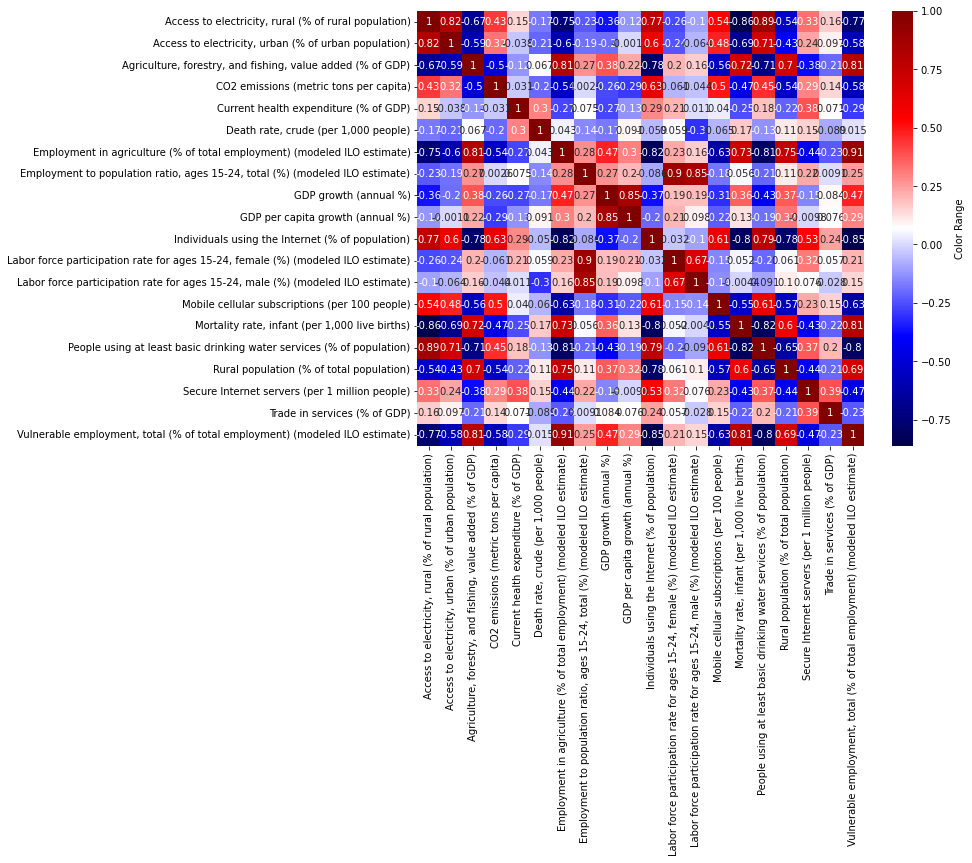

In [10]:
#Plot correlation matrix of indicators
plt.figure(figsize=(10,8))
corrMatrix = df_final.T.corr()
sns.heatmap(corrMatrix, annot=True, cbar_kws={'label': 'Color Range'}, cmap="seismic")

/var/folders/dp/2ms1d3nx6nq459ycjnlz_p740000gn/T/ipykernel_5408/4272676397.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corrMatrix, dtype=np.bool))


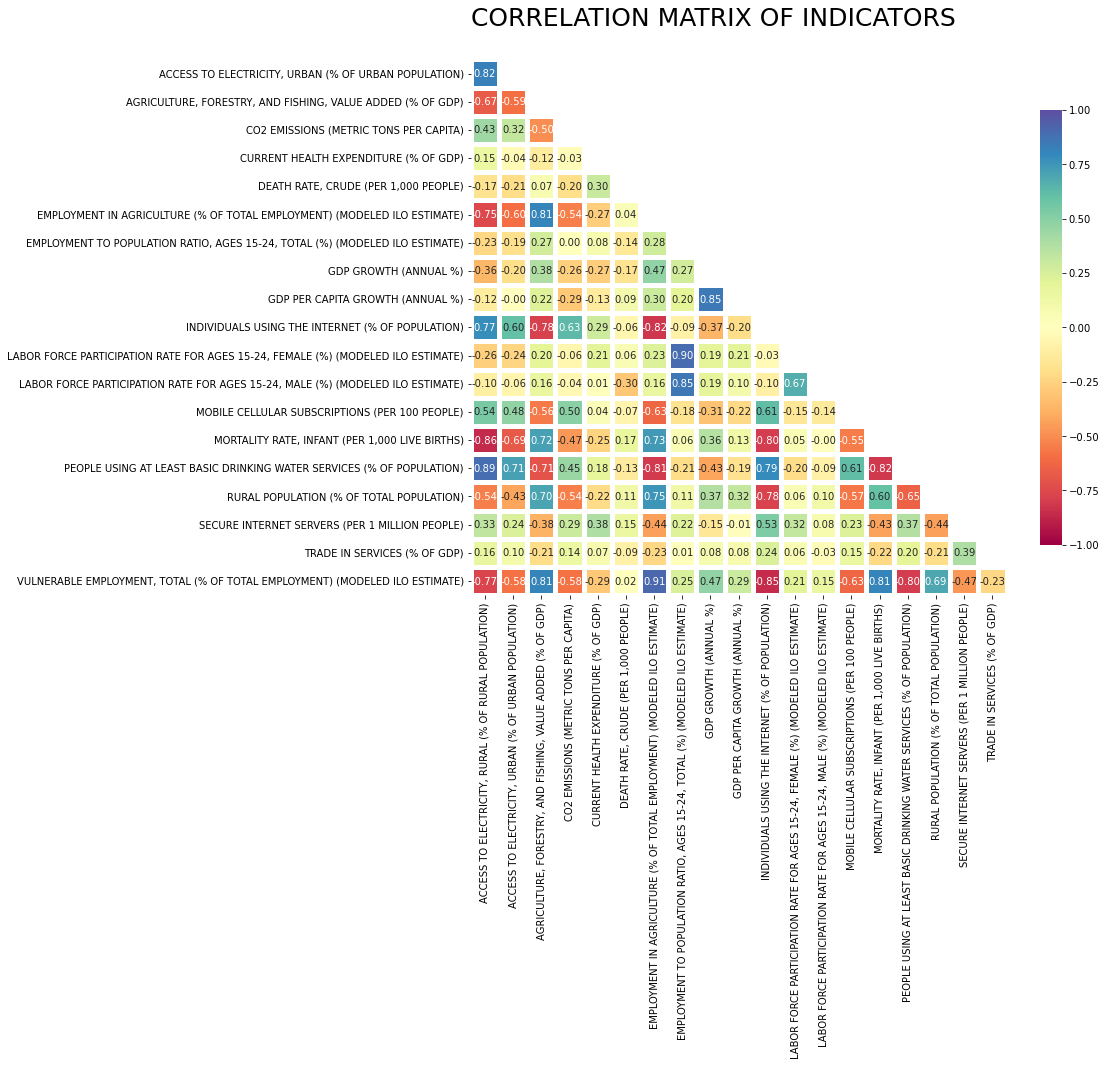

In [11]:
corrMatrix = df_final.T.corr()

fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(corrMatrix, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = corrMatrix.iloc[1:,:-1].copy()
# color map
cmap = sns.color_palette("Spectral", as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX OF INDICATORS\n'
plt.title(title, loc='left', fontsize=25)
plt.show()

### K-means Cluster Analysis

In [12]:
#standardization along columns
df_final_std=(df_final.T-df_final.T.mean())/df_final.T.std()

df_final_std.head(5)

,"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions (metric tons per capita),Current health expenditure (% of GDP),"Death rate, crude (per 1,000 people)",Employment in agriculture (% of total employment) (modeled ILO estimate),"Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)",GDP growth (annual %),GDP per capita growth (annual %),Individuals using the Internet (% of population),"Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",People using at least basic drinking water services (% of population),Rural population (% of total population),Secure Internet servers (per 1 million people),Trade in services (% of GDP),"Vulnerable employment, total (% of total employment) (modeled ILO estimate)"
Afghanistan,-0.343706,0.496160,1.126010,-0.705926,0.855704,-0.235424,0.947575,-0.255572,-0.277066,-1.050870,-1.527872,-1.049561,0.775302,-1.612205,1.526368,-1.929263,1.451331,-0.478324,-0.357576,1.657158
Algeria,0.689428,0.496160,-0.097492,-0.142934,-0.391623,-1.127714,-0.647515,-1.325894,0.112104,-0.123090,-0.263951,-1.807320,-0.498824,0.014910,-0.004112,0.381452,-0.481068,-0.476681,-0.574539,-0.351251
Angola,-2.127431,-1.734139,-0.413229,-0.477789,-1.384310,0.613206,1.312265,0.740532,0.482156,-0.314689,-1.496854,1.350199,0.454638,-1.848289,1.730065,-2.143029,-0.144748,-0.481023,-0.214654,1.134194
Argentina,0.641639,0.496160,-0.456147,-0.005111,0.793102,-0.048307,-1.119712,-0.565777,-2.172212,-2.188594,0.719498,-0.351977,-0.220807,1.112260,-0.626213,0.749508,-1.473883,-0.347276,-0.613839,-0.548843
Armenia,0.696340,0.496160,0.712866,-0.439959,1.163888,0.738684,0.309162,-1.007101,0.039731,0.408966,0.366468,-0.390283,-0.739708,0.318397,-0.505096,0.770258,-0.267443,-0.459485,0.129330,0.093408


### Finding the optimal number of k clusters.

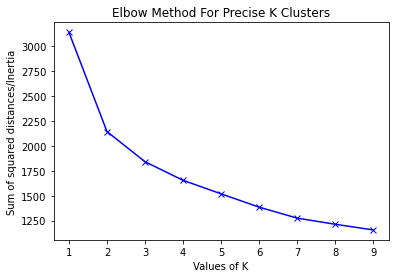

In [13]:
#Elbow method
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df_final_std)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Precise K Clusters')
plt.show()

### Silhouette analysis

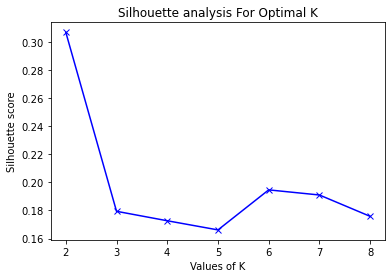

In [14]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df_final_std)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(df_final_std, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal K')
plt.show()

#### From both methods we find that k=2

In [15]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df_final_std)

KMeans(n_clusters=2)

In [16]:
# inertia on the fitted data
kmeans.inertia_

2143.990677496662

### Prediction

In [17]:

pred = kmeans.predict(df_final_std)

frame = pd.DataFrame(df_final_std)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    109
0     49
Name: cluster, dtype: int64

In [18]:
df_final_T = df_final.T
df_final_T['cluster'] = pred
df_final_T.sort_values("cluster", inplace = True, ascending=True)

df_final_std['cluster'] = pred
df_final_std.sort_values("cluster", inplace = True, ascending=True)

df_cluster = df_final_T.groupby('cluster').mean()
df_cluster_std = df_final_std.groupby('cluster').mean()

df_final_T.to_csv('clusters.csv')

### Heatmap of cluster characteristics

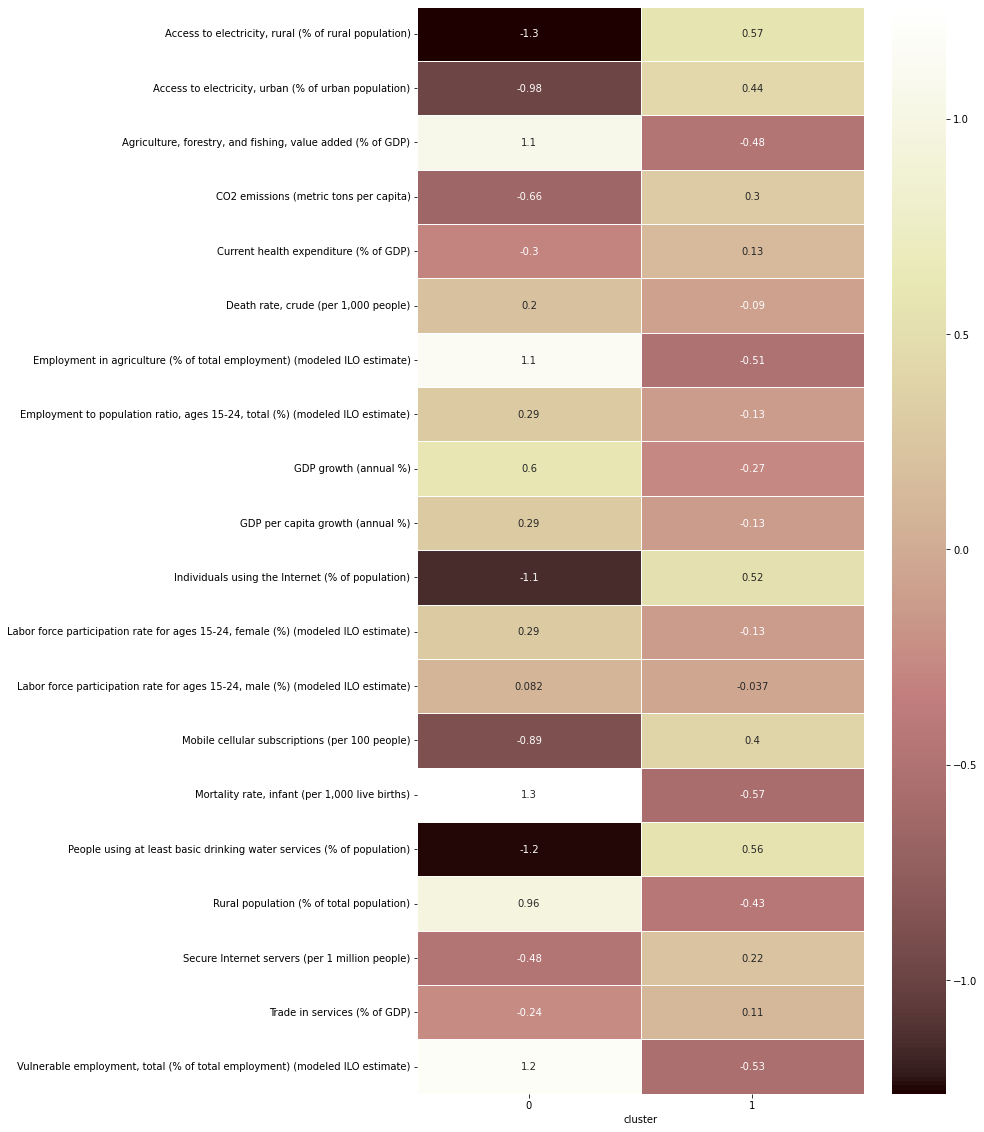

In [19]:
#Heatmap of cluster characteristics
plt.figure(figsize=(10,20))
sns.heatmap(df_cluster_std.T, annot=True, cmap="pink", linewidths=.5)
plt.savefig('hk.png')

In [20]:
# counting the number of clustering nations
num_of_countries = []
for n in range(len(set(pred))):
    num_of_countries.append(sum(df_final_T['cluster'] == n))
    
df_cluster['num of countries'] = num_of_countries
df_cluster_std['num of countries'] = num_of_countries

columns = list(df_cluster.columns)
columns = columns[-1:] + columns[:-1]

df_cluster = df_cluster.reindex(columns=columns)
df_cluster_std = df_cluster_std.reindex(columns=columns)

df_cluster

,num of countries,"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions (metric tons per capita),Current health expenditure (% of GDP),"Death rate, crude (per 1,000 people)",Employment in agriculture (% of total employment) (modeled ILO estimate),"Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)",GDP growth (annual %),...,Individuals using the Internet (% of population),"Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",People using at least basic drinking water services (% of population),Rural population (% of total population),Secure Internet servers (per 1 million people),Trade in services (% of GDP),"Vulnerable employment, total (% of total employment) (modeled ILO estimate)"
cluster,,,,,,,,,,,,,,,,,,,,,
0,49,33.234733,82.576516,22.131848,0.532720,5.509491,8.328694,46.865204,40.976388,5.138433,...,23.816908,41.606878,49.580959,80.249400,43.059184,67.107507,64.766163,37.396119,17.485098,67.419817
1,109,95.631871,99.343446,5.828059,6.457169,6.658022,7.537202,12.627046,35.046486,2.749259,...,68.773614,34.941193,47.960376,120.963066,9.887156,95.893414,32.909982,8432.848848,28.234951,22.187835


### Curve Fitting

In [21]:
#Load data of cluster 2 countries for Year vs GDP Growth
data_SL = pd.read_csv('Sri_Lanka.csv')

data_SL

,Year,Internet
0,1990,0.000000
1,2000,21.384731
2,2010,56.300000
3,2011,61.000000
4,2012,65.800000
5,2013,57.057512
6,2014,63.665426
7,2015,71.064068
8,2016,78.788310
9,2017,80.140479


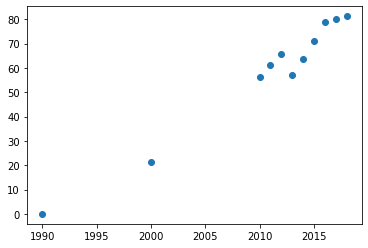

In [22]:
x, y = data_SL['Year'], data_SL['Internet']

# plot input vs output
plt.scatter(x, y)
plt.show()

In [23]:
# define the true objective function
def objective(x, a, b):
	return a * x + b

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

y = 2.99132 * x + -5956.33368


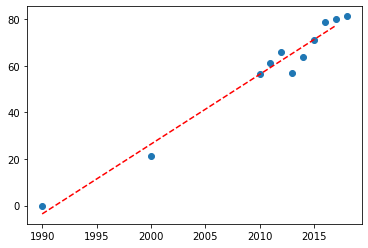

In [24]:
# compare input and output by plotting
# between the smallest and greatest known inputs, define a sequence of inputs.
# generate a line graph for the mapping function
# compute the output for the specified range
plt.scatter(x, y)

x_line = arange(min(x), max(x), 1)

y_line = objective(x_line, a, b)

plt.plot(x_line, y_line,'--', color='red')

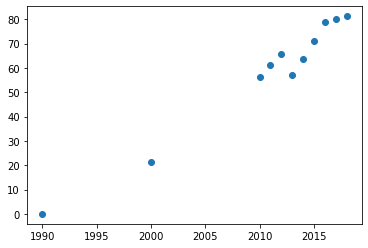

In [25]:
#Load data of cluster 2 countries for Year vs GDP Growth
data_colombia = pd.read_csv('colombia.csv')

x, y = data_colombia['Year'], data_SL['Internet']

# compare input and output by plotting
plt.scatter(x, y)
plt.show()

In [26]:
# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c

# curve fit
popt, _ = curve_fit(objective, x, y)

# the summary of parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = -115.75491 * x + 0.02962 * x^2 + 113037.91216


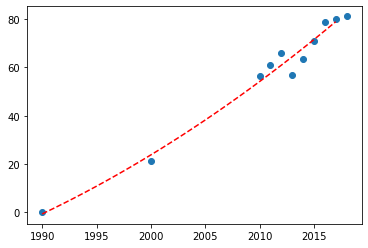

In [27]:
# compare input and output
# between the smallest and greatest known inputs, define a sequence of inputs. 
#compute the outcome for the specified range
# generate a line graph for the mapping function
plt.scatter(x, y)

x_line = arange(min(x), max(x), 1)

y_line = objective(x_line, a, b, c)

plt.plot(x_line, y_line, '--', color='red')
plt.show()

---